In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bank_df_train = pd.read_csv('application_train.csv')
bank_df_test = pd.read_csv('application_test.csv')

In [ ]:
pd.set_option('display.max_columns', None)
bank_df_train.head()

In [ ]:
bank_df_train.info(verbose=True, null_counts=True)

In [ ]:
bank_df_test.info(verbose=True, null_counts=True)

idea for missing data function
https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset

In [48]:
#function for missing data
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (total / data.isnull().count() * 100)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [49]:
missing_bank_train = missing_data(bank_df_train)
missing_bank_train

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
...,...,...
REG_CITY_NOT_LIVE_CITY,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
HOUR_APPR_PROCESS_START,0,0.000000


In [5]:
missing_bank_test = missing_data(bank_df_test)
missing_bank_test

,Total,Percent
COMMONAREA_MEDI,33495,68.716150
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
...,...,...
REG_CITY_NOT_WORK_CITY,0,0.000000
REG_CITY_NOT_LIVE_CITY,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000


In [45]:
clean_data_train = bank_df_train.drop(columns=missing_bank_train[missing_bank_train['Total'] > 5].index)
clean_data_test = bank_df_test.drop(columns=missing_bank_test[missing_bank_test['Total'] > 5].index)

In [ ]:
clean_data_train['CNT_FAM_MEMBERS'].describe()

In [ ]:
clean_data_train['DAYS_LAST_PHONE_CHANGE'].describe()

In [7]:
clean_data_train.loc[clean_data_train['CNT_FAM_MEMBERS'].isnull(),'CNT_FAM_MEMBERS']=clean_data_train['CNT_FAM_MEMBERS'].mean()
clean_data_train.loc[clean_data_train['DAYS_LAST_PHONE_CHANGE'].isnull(),'DAYS_LAST_PHONE_CHANGE']=clean_data_train['DAYS_LAST_PHONE_CHANGE'].mean()

In [8]:
clean_data_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [9]:
clean_data_test.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   48744 non-null  int64  
 1   NAME_CONTRACT_TYPE           48744 non-null  object 
 2   CODE_GENDER                  48744 non-null  object 
 3   FLAG_OWN_CAR                 48744 non-null  object 
 4   FLAG_OWN_REALTY              48744 non-null  object 
 5   CNT_CHILDREN                 48744 non-null  int64  
 6   AMT_INCOME_TOTAL             48744 non-null  float64
 7   AMT_CREDIT                   48744 non-null  float64
 8   AMT_GOODS_PRICE              48744 non-null  float64
 9   NAME_INCOME_TYPE             48744 non-null  object 
 10  NAME_EDUCATION_TYPE          48744 non-null  object 
 11  NAME_FAMILY_STATUS           48744 non-null  object 
 12  NAME_HOUSING_TYPE            48744 non-null  object 
 13  REGION_POPULATIO

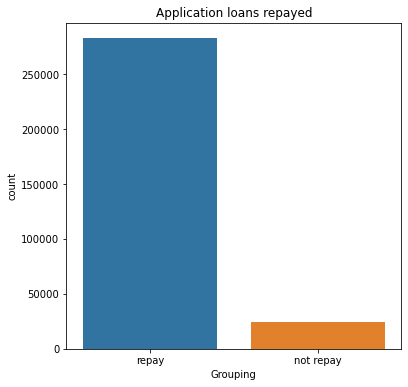

In [10]:
#checking data unbalance
temp = clean_data_train["TARGET"].value_counts()
df = pd.DataFrame({'Grouping': temp.index,
                   'count': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed')
sns.barplot(x = 'Grouping', y="count", data=df)
locs, labels = plt.xticks(ticks=[0,1], labels=["repay", "not repay"])
plt.show()

In [ ]:
#Function to create barplot
def plot_stats(feature,label_rotation=False):
    temp = clean_data_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Count': temp.values})
    sns.set_color_codes("pastel")
    s = sns.barplot(x = feature, y="Count",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show();

In [ ]:
#barplot for Name Contract Type
plot_stats('NAME_CONTRACT_TYPE')

In [ ]:
#barplot for Name Income Type
plot_stats('NAME_INCOME_TYPE',True)

In [ ]:
#barplot for Name Family Status
plot_stats('NAME_FAMILY_STATUS',True)

In [ ]:
#barplot for Name Housing Type
plot_stats('NAME_HOUSING_TYPE',True)

In [11]:
#dropping sk id curr column
clean_data_train.drop(['SK_ID_CURR'],axis=1,inplace=True) 
clean_data_test.drop(['SK_ID_CURR'],axis=1,inplace=True) 

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
#creating dummy variables for categorical features in train dataset
#clean_data_train = pd.get_dummies(clean_data_train, columns=['NAME_CONTRACT_TYPE','CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'], drop_first=True)

clean_data_train['NAME_CONTRACT_TYPE'] = encoder.fit_transform(clean_data_train['NAME_CONTRACT_TYPE'])
clean_data_train['CODE_GENDER'] = encoder.fit_transform(clean_data_train['CODE_GENDER'])
clean_data_train['FLAG_OWN_CAR'] = encoder.fit_transform(clean_data_train['FLAG_OWN_CAR'])
clean_data_train['FLAG_OWN_REALTY'] = encoder.fit_transform(clean_data_train['FLAG_OWN_REALTY'])
clean_data_train['NAME_INCOME_TYPE'] = encoder.fit_transform(clean_data_train['NAME_INCOME_TYPE'])
clean_data_train['NAME_EDUCATION_TYPE'] = encoder.fit_transform(clean_data_train['NAME_EDUCATION_TYPE'])
clean_data_train['NAME_FAMILY_STATUS'] = encoder.fit_transform(clean_data_train['NAME_FAMILY_STATUS'])
clean_data_train['NAME_HOUSING_TYPE'] = encoder.fit_transform(clean_data_train['NAME_HOUSING_TYPE'])
clean_data_train['WEEKDAY_APPR_PROCESS_START'] = encoder.fit_transform(clean_data_train['WEEKDAY_APPR_PROCESS_START'])
clean_data_train['ORGANIZATION_TYPE'] = encoder.fit_transform(clean_data_train['ORGANIZATION_TYPE'])

In [14]:
#creating dummy variables for categorical features in train dataset
#clean_data_test = pd.get_dummies(clean_data_test, columns=['NAME_CONTRACT_TYPE','CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'], drop_first=True)

clean_data_test['NAME_CONTRACT_TYPE'] = encoder.fit_transform(clean_data_test['NAME_CONTRACT_TYPE'])
clean_data_test['CODE_GENDER'] = encoder.fit_transform(clean_data_test['CODE_GENDER'])
clean_data_test['FLAG_OWN_CAR'] = encoder.fit_transform(clean_data_test['FLAG_OWN_CAR'])
clean_data_test['FLAG_OWN_REALTY'] = encoder.fit_transform(clean_data_test['FLAG_OWN_REALTY'])
clean_data_test['NAME_INCOME_TYPE'] = encoder.fit_transform(clean_data_test['NAME_INCOME_TYPE'])
clean_data_test['NAME_EDUCATION_TYPE'] = encoder.fit_transform(clean_data_test['NAME_EDUCATION_TYPE'])
clean_data_test['NAME_FAMILY_STATUS'] = encoder.fit_transform(clean_data_test['NAME_FAMILY_STATUS'])
clean_data_test['NAME_HOUSING_TYPE'] = encoder.fit_transform(clean_data_test['NAME_HOUSING_TYPE'])
clean_data_test['WEEKDAY_APPR_PROCESS_START'] = encoder.fit_transform(clean_data_test['WEEKDAY_APPR_PROCESS_START'])
clean_data_test['ORGANIZATION_TYPE'] = encoder.fit_transform(clean_data_test['ORGANIZATION_TYPE'])

In [15]:
X = clean_data_train.drop(['TARGET'], axis=1)
y = clean_data_train['TARGET']
#Test dataset doesn't have the target feature
#X_test = clean_data_test.drop(['TARGET'], axis=1)
#y_test = clean_data_test['TARGET']

### Oversampling the unbalanced data

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(clean_data_train[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']], clean_data_train['TARGET'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'])

In [ ]:
df_oversampler

In [ ]:
df_oversampler['TARGET']= y

# Balanced data count
sns.countplot(df_oversampler['TARGET'])

### Scaling

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

### PCA

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([8.14531451e-02, 5.10844854e-02, 4.28175082e-02, 3.55962760e-02,
       3.05215440e-02, 2.87423638e-02, 2.64541962e-02, 2.52255204e-02,
       2.46113784e-02, 2.19439074e-02, 2.13841704e-02, 2.00855057e-02,
       1.96053691e-02, 1.92597985e-02, 1.90176920e-02, 1.87930926e-02,
       1.86397396e-02, 1.85907731e-02, 1.85777006e-02, 1.85469425e-02,
       1.85263933e-02, 1.85194505e-02, 1.85177312e-02, 1.84989137e-02,
       1.84405870e-02, 1.83384020e-02, 1.82525336e-02, 1.82391805e-02,
       1.79782366e-02, 1.78676271e-02, 1.74470004e-02, 1.71086788e-02,
       1.67021866e-02, 1.63725832e-02, 1.61006391e-02, 1.58079621e-02,
       1.51955992e-02, 1.48228816e-02, 1.44319309e-02, 1.33784113e-02,
       1.30288271e-02, 1.29036527e-02, 1.20644725e-02, 1.16691115e-02,
       1.14821074e-02, 1.10018962e-02, 8.68043311e-03, 6.39654270e-03,
       5.22659339e-03, 2.47413710e-03, 1.41771675e-03, 1.27697461e-03,
       8.72674716e-04, 6.82243509e-06, 3.88215945e-33])

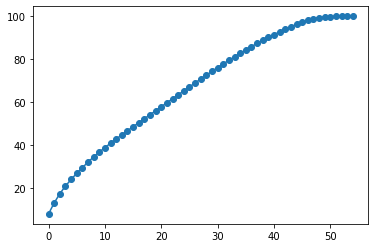

In [21]:
var1=np.cumsum(explained_variance*100)
plt.plot(var1,  marker='o')

In [22]:
pca = PCA(n_components = 50)
X_train50 = pca.fit_transform(X_train_scaled)
X_test50 = pca.transform(X_test_scaled)
explained_variance = pca.explained_variance_ratio_

In [23]:
explained_variance

array([0.08145315, 0.05108449, 0.04281751, 0.03559628, 0.03052154,
       0.02874236, 0.0264542 , 0.02522552, 0.02461138, 0.02194391,
       0.02138417, 0.02008551, 0.01960537, 0.0192598 , 0.01901769,
       0.01879309, 0.01863974, 0.01859077, 0.0185777 , 0.01854694,
       0.01852639, 0.01851945, 0.01851773, 0.01849891, 0.01844059,
       0.0183384 , 0.01825253, 0.01823918, 0.01797824, 0.01786763,
       0.017447  , 0.01710868, 0.01670219, 0.01637258, 0.01610064,
       0.01580796, 0.0151956 , 0.01482288, 0.01443193, 0.01337841,
       0.01302883, 0.01290365, 0.01206447, 0.01166911, 0.01148211,
       0.0110019 , 0.00868043, 0.00639654, 0.00522659, 0.00247414])

In [24]:
sum(explained_variance)

0.9964258114956693

## Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression(random_state = 101, multi_class = 'auto')
logmodel.fit(X_train50,y_train)

In [ ]:
predictions = logmodel.predict(X_test50)

#### Evaluation

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test, predictions))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('scaler', StandardScaler()),
                ('pca', PCA()),
                ('LR', LogisticRegression(random_state = 101, multi_class = 'auto'))])

In [ ]:
pipe.get_params().keys()

In [ ]:
param_grid = {'pca__n_components':[50], # choose the number of pca components
        'LR__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'LR__penalty' : ['l2']}

In [ ]:
grid = GridSearchCV(estimator=pipe,param_grid=param_grid,verbose=3)

In [ ]:
grid.fit(X_train50,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid_predictions = grid.predict(X_test50)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

In [ ]:
print(classification_report(y_test,grid_predictions))

### Neural Network

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from keras.layers import Dense, Input, Dropout
from keras import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold

In [ ]:
def create_model():
    classifier = Sequential()
    # adding 50 input PCAs, 25 nodes in the hidden layer
    classifier.add(Dense(input_dim=50,units=25,activation="relu"))
    #adding an additional hidden layer
    classifier.add(Dense(units=25, activation="relu" ))
    #adding the output layer with sigmoid function
    classifier.add(Dense(units=1, activation="sigmoid"))
    classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return classifier

In [ ]:
#batch_size = [10, 100, 500]
#epochs = [10, 50, 100]
#tried GridSearch with the above parameter which took hours to complete. 
#Therefore, reducing the size of the parameter grid
#in order to capture the highest performing parameters

batch_size = [10]
epochs = [10, 100]
param_grid = dict(nn__batch_size=batch_size, nn__epochs=epochs)

In [ ]:
estimators = []
#estimators.append(('ss', StandardScaler()))
#estimators.append(('pca', PCA()))
estimators.append(('nn', KerasClassifier(build_fn=create_model, verbose=3)))
nn_pipe = Pipeline(estimators)

In [ ]:
nn_pipe.get_params().keys()

In [ ]:
gs_nn = GridSearchCV(nn_pipe,param_grid,verbose=3)

In [ ]:
gs_nn.fit(X_train50,y_train)

# IT WOULD TAKE UPTO 2-3 HOURS

In [ ]:
gs_nn.best_params_

In [ ]:
y_pred = gs_nn.predict(X_test50)

In [ ]:
y_pred = (y_pred>0.5)

In [ ]:
y_pred

#### Evaluation

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

In [ ]:
print(classification_report(y_test,y_pred))

## Random Forest Classification Model

In [25]:
import warnings
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import validation_curve

In [29]:
model = RandomForestClassifier(random_state=101)

In [30]:
param_grid = {"n_estimators": [10, 50, 100]} 

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
grid_forest = GridSearchCV(model,param_grid,verbose=3)

In [33]:
grid_forest.fit(X_train50,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ................................n_estimators=10; total time=  50.6s
[CV 2/5] END ................................n_estimators=10; total time=  48.5s
[CV 3/5] END ................................n_estimators=10; total time=  50.6s
[CV 4/5] END ................................n_estimators=10; total time=  51.1s
[CV 5/5] END ................................n_estimators=10; total time=  51.8s
[CV 1/5] END ................................n_estimators=50; total time= 4.7min
[CV 2/5] END ................................n_estimators=50; total time= 4.2min
[CV 3/5] END ................................n_estimators=50; total time= 4.3min
[CV 4/5] END ................................n_estimators=50; total time= 4.2min
[CV 5/5] END ................................n_estimators=50; total time= 4.4min
[CV 1/5] END ...............................n_estimators=100; total time= 9.3min
[CV 2/5] END ...............................n_est

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'n_estimators': [10, 50, 100]}, verbose=3)

In [34]:
grid_forest.best_params_

{'n_estimators': 100}

In [35]:
predictions = grid_forest.predict(X_test50)

In [38]:
print(confusion_matrix(y_test, predictions))

[[76875  8085]
 [12345 72307]]


In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     84960
           1       0.90      0.85      0.88     84652

    accuracy                           0.88    169612
   macro avg       0.88      0.88      0.88    169612
weighted avg       0.88      0.88      0.88    169612

